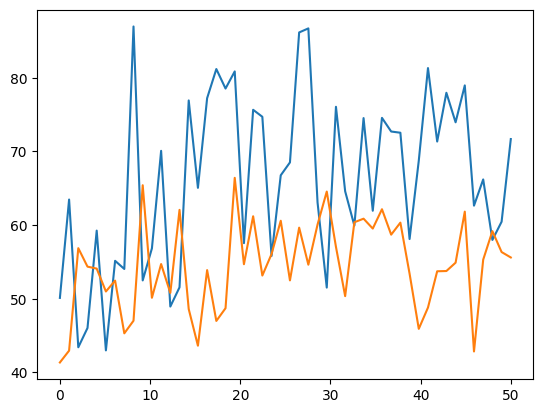

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def createLiePulse():
    blank=np.linspace(55,50,50)
    pulse=70+15*np.sin(blank+np.random.normal(0,1,50))
    pulse+=np.random.normal(-5,5,50)
    #plt.plot(np.linspace(0,50),pulse)
    # print(np.std(pulse), np.var(pulse))
    return pulse


def createTruthPulse():
    blank=np.linspace(55,50,50)
    pulse=60+5*np.sin(blank+np.random.normal(0,1,50))
    pulse+=np.random.normal(-5,5,50)
    #print(pulse)
    #plt.plot(np.linspace(0,50),pulse)
    return pulse

plt.plot(np.linspace(0,50),createLiePulse())
plt.plot(np.linspace(0,50),createTruthPulse())

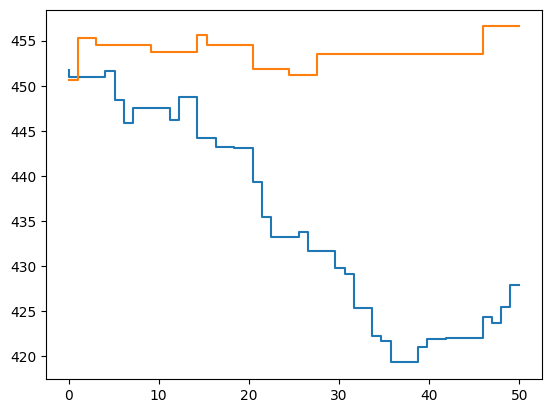

In [4]:
def createGSRLie():
    blank=np.ones(50)
    blank[0]=450+np.random.uniform(-15,15)
    for i in range(1,35):
        inc=np.random.uniform(0,1)
        if inc>0.6:
            blank[i]=blank[i-1]-np.random.uniform(0,5)
        elif inc<0.6 and inc>0.1:
            blank[i]=blank[i-1]
        else:
            blank[i]=blank[i-1]+np.random.uniform(0,3)

    for i in range(35,50):
        inc=np.random.uniform(0,1)
        if inc>0.5:
            blank[i]=blank[i-1]+np.random.uniform(0,5)
        elif inc<0.5 and inc>0.1:
            blank[i]=blank[i-1]
        else:
            blank[i]=blank[i-1]-np.random.uniform(0,3)
    #plt.plot(np.linspace(0,len(blank),len(blank)),blank)
    #plt.step(np.linspace(0,len(blank),len(blank)),blank)
    return blank
    
def createGSRTruth():
    blank=np.ones(50)
    blank[0]=450+np.random.uniform(-15,15)
    for i in range(1,50):
        inc=np.random.uniform(0,1)
        if inc>0.9:
            blank[i]=blank[i-1]+np.random.uniform(0,5)
        elif inc<0.9 and inc>0.1:
            blank[i]=blank[i-1]
        else:
            blank[i]=blank[i-1]-np.random.uniform(0,3)

    
    #plt.plot(np.linspace(0,len(blank),len(blank)),blank)
    #plt.step(np.linspace(0,len(blank),len(blank)),blank)
    return blank
    

plt.step(np.linspace(0,len(createGSRLie()),len(createGSRLie())),createGSRLie())
plt.step(np.linspace(0,len(createGSRTruth()),len(createGSRTruth())),createGSRTruth())

In [5]:
def createFullDataSet():
    df = pd.DataFrame()
    GSR=[createGSRLie()]
    Pulse=[createLiePulse()]
    Condition=["lie"]
    for i in range(1,9):
        GSR.append(createGSRTruth())
        Pulse.append(createTruthPulse())
        Condition.append("truth")
    GSR.append(createGSRLie())
    Pulse.append(createLiePulse())
    Condition.append("lie")

    df["GSR"]=GSR
    df["Pulse"]=Pulse
    df["Condition"]=Condition
    df["ID"]=np.linspace(0,9,10)
    return df
    

createFullDataSet()
    

,GSR,Pulse,Condition,ID
0,"[446.5976101423951, 449.5278097304576, 449.527...","[56.22355072533545, 53.031343655954586, 53.540...",lie,0.0
1,"[451.5748321690845, 451.5748321690845, 451.574...","[40.949855439886576, 56.932179877417624, 47.11...",truth,1.0
2,"[440.7605671496957, 440.7605671496957, 440.760...","[44.52867063912828, 46.530809663020285, 53.744...",truth,2.0
3,"[443.3403797504624, 444.2299879944228, 444.229...","[45.99599672029909, 55.832494463894086, 61.940...",truth,3.0
4,"[437.9437204263818, 437.9437204263818, 437.943...","[52.152046365450964, 49.8285627405103, 58.6961...",truth,4.0
5,"[463.9701815481369, 463.9701815481369, 463.970...","[53.63833134846174, 51.69054160695074, 55.4181...",truth,5.0
6,"[449.90490838601335, 449.90490838601335, 449.9...","[43.73716674381696, 56.640297111182704, 54.765...",truth,6.0
7,"[464.1767681492932, 464.1767681492932, 464.176...","[46.880165662602806, 53.265337730195036, 57.51...",truth,7.0
8,"[443.1627023511832, 443.1627023511832, 443.162...","[57.41530394806518, 44.34936890403794, 58.0451...",truth,8.0
9,"[448.3585201010816, 448.3585201010816, 444.893...","[49.92718628738949, 56.52038844253153, 53.2578...",lie,9.0


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from  itertools import chain
df=createFullDataSet()
vals = df.GSR.str.len()
df1 = pd.DataFrame({
        "ID": np.repeat(df.ID.values,vals),
        "GSR": list(chain.from_iterable(df.GSR)),
        "Pulse": list(chain.from_iterable(df.Pulse)),
        "Condition": np.repeat(df.Condition.values,vals)})
df1 = df1.reindex(df.columns, axis=1)
df1
# print (df1)

df1.groupby("ID")
df1
X=df1[["GSR","Pulse"]].values
Y=df1[["Condition","ID"]].values
X_std = StandardScaler().fit_transform(X)

print('Covariance matrix \n') 
cov_mat= np.cov(X_std, rowvar=False) 
cov_mat
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)



Covariance matrix 

Eigenvectors 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues 
[1.07549488 0.92851314]


In [8]:
df=createFullDataSet()
npdf=df.drop(["Condition","ID"],axis=1).to_numpy()
data_2d = np.array([features_2d.flatten() for features_2d in data])
data_2d
pca = PCA(n_components=2)
pca.fit(data_2d)
data_pca = pca.transform(data_2d)
print("original shape:   ", data_2d.shape) ##(69,2640*7680)
print("transformed shape:", data_pca.shape)
np.array([[[23,2],[2,3],[2,3]],[[2,3],[2,3],[2,3]]]).shape

npdf.shape
npdf

NameError: name 'data' is not defined

       GSRVar    PulseVar
0  155.644606  128.060199
1   10.780213   41.134484
2    3.787809   25.075200
3   71.396534   36.835143
4    3.787629   32.864900
5    1.950319   55.938924
6    6.385015   36.966190
7   20.054708   27.397848
8    2.914344   31.578034
9  113.681140  137.258065
[[155.64460644 128.06019944]
 [ 10.78021287  41.13448367]
 [  3.78780887  25.07520031]
 [ 71.39653369  36.83514273]
 [  3.78762867  32.86490046]
 [  1.95031897  55.93892428]
 [  6.38501489  36.96619023]
 [ 20.05470765  27.39784773]
 [  2.91434364  31.57803408]
 [113.68113968 137.25806476]]


<Axes: >

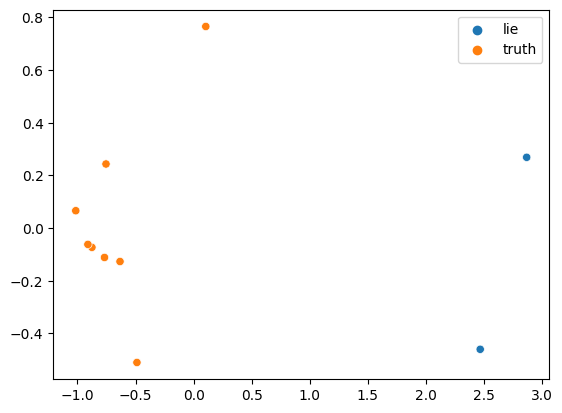

In [11]:
df=createFullDataSet()
GSRVar=[]
PulseVar=[]
for i in df["GSR"]:
    GSRVar.append(np.var(i))
for i in df["Pulse"]:
    PulseVar.append(np.var(i))

GSRVar
PulseVar
df["GSRVar"]=GSRVar
df["PulseVar"]=PulseVar

df2=df.drop(["GSR","Pulse"],axis=1)
df2
print(df2[["GSRVar","PulseVar"]])
X=df2[["GSRVar","PulseVar"]].values
print(X)
Y=df2[["Condition","ID"]].values
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], hue=Y[:,0])
